In [67]:
import numpy as np
import pandas as pd


from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

import matplotlib.pyplot as plt



In [4]:
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

In [5]:
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


In [11]:
predictions = pd.Series(np.zeros(len(outcomes), dtype = int))
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


In [13]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
for _, passenger in data.head().iterrows():
    print passenger.Name, passenger.Sex
    


Braund, Mr. Owen Harris male
Cumings, Mrs. John Bradley (Florence Briggs Thayer) female
Heikkinen, Miss. Laina female
Futrelle, Mrs. Jacques Heath (Lily May Peel) female
Allen, Mr. William Henry male


In [21]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        predictions.append(passenger.Sex=='female')
        
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)
accuracy_score(outcomes, predictions)

In [23]:
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 78.68%.'

In [20]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [53]:
def predictions_2(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger.Sex=='female':
            predictions.append(True)
        elif passenger.Age<10:
            predictions.append(True)
        else:
            predictions.append(False)
            
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 79.35%.'

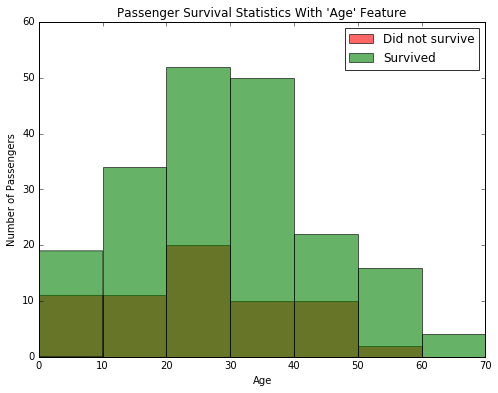

In [70]:
survival_stats(data, outcomes, 'Age', ["Sex == 'female'"])

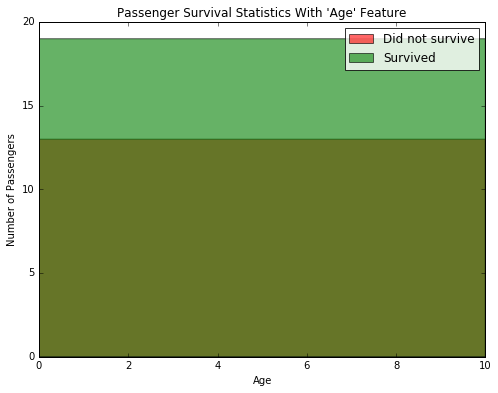

In [131]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 10"])

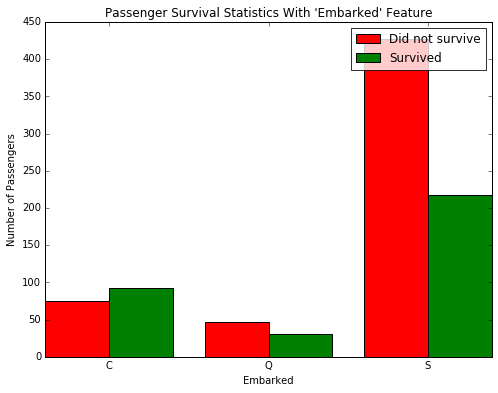

Passengers with missing 'Embarked' values: 2 (2 survived, 0 did not survive)


In [98]:
survival_stats(data, outcomes, 'Embarked')

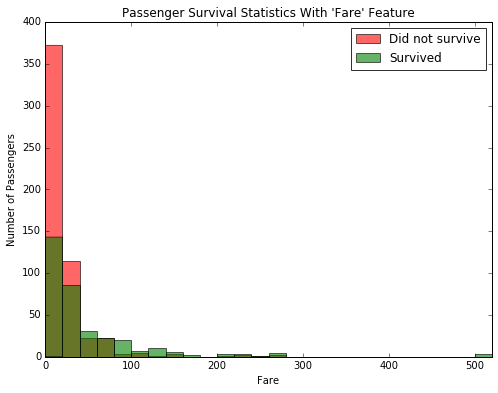

In [108]:
survival_stats(data, outcomes, 'Fare')

In [181]:
def predictions_3(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if (passenger.Sex=='female') & (passenger.Pclass<3):
            predictions.append(True)
        
        elif passenger.Age<7:            
            predictions.append(True)
            
        elif (passenger.Fare>300):
            predictions.append(True)
            
        elif (passenger.Pclass<2) & (passenger.Age<18):
            predictions.append(True)

        else:
            predictions.append(False)
            
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 80.70%.'

In [157]:
match=(full_data.Sex=='male') & (full_data.Age<10)
full_data[match].Survived.value_counts()


1    19
0    13
Name: Survived, dtype: int64

In [159]:
19.0/32

0.59375

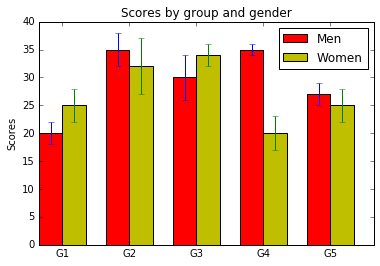

In [68]:
#!/usr/bin/env python
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, womenMeans, width, color='y', yerr=womenStd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))
plt.show()